In [1]:
import os 
os.chdir('/home/oleksandr/UT/Thesis/Implementations/')

In [26]:
from tqdm import tqdm
from scipy.stats import friedmanchisquare, wilcoxon
import numpy as np
from matplotlib import pyplot as plt

In [46]:
from src.standard_ga.simulation import GA
from src.common.fitness import griewank
from src.common.scales import scales

In [47]:
# Regular GA

sample_regular = []

for seed in tqdm(range(100)):
    ga = GA(fitness_fn=griewank, population_scale=scales['griewank'][0], 
            mutation_scale=scales['griewank'][1])
    history, _, _ = ga.run(10, seed=seed)
    sample_regular.append(history['best_fitness'].min())

100%|██████████| 100/100 [00:35<00:00,  2.80it/s]


In [48]:
# Regular GAx2

sample_x_2 = []

for seed in tqdm(range(100)):
    ga = GA(fitness_fn=griewank, population_scale=scales['griewank'][0], 
            mutation_scale=scales['griewank'][1]*2)
    history, _, _ = ga.run(10, seed=seed)
    sample_x_2.append(history['best_fitness'].min())

100%|██████████| 100/100 [00:33<00:00,  3.03it/s]


In [49]:
pvals = []
for i in range(10, 100):
    pval = friedmanchisquare(sample_x_2[:i], sample_regular[:i], sample_x_2[:i]).pvalue
    pvals.append(pval)

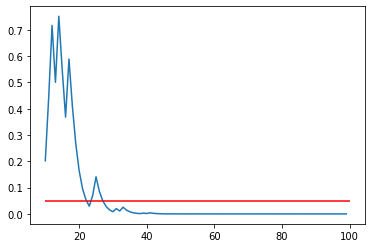

In [50]:
plt.plot(list(range(10, 100)), pvals)
plt.hlines(xmax=100, xmin=10, y=.05, colors='red')
plt.show()